# Problem Set 2: Classification

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer (use "Raw" link on gist\github), run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

If a certain output is given for some cells, that means that you are expected to get similar results in order to receive full points (small deviations are fine). For some parts we have already written the code for you. You should read it closely and understand what it does.

Total: 100 points.

### 1. Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student
gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine
each applicant’s chance of admission based on their results on two exams. You have historical
data from previous applicants in *ex2data1.txt* that you can use as a training set for logistic regression. For each
training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. This outline and code framework will guide you through the exercise.

**1\.1 Implementation**

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**1.1.1 Visualizing the data**

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. This first part of the code will load the data and display it on a 2-dimensional plot by calling the function plotData. The axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [25]:
datafile = 'data/ex2data1.txt'
# Read in comma separated data in datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
# Form the usual "X" data matrix and "y" label vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
# Insert the usual column of 1's into the "X" matrix (for bias incorporation)
X = np.insert(X,0,1,axis=1)

In [26]:
# Divide the sample into two: pos classification, neg classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

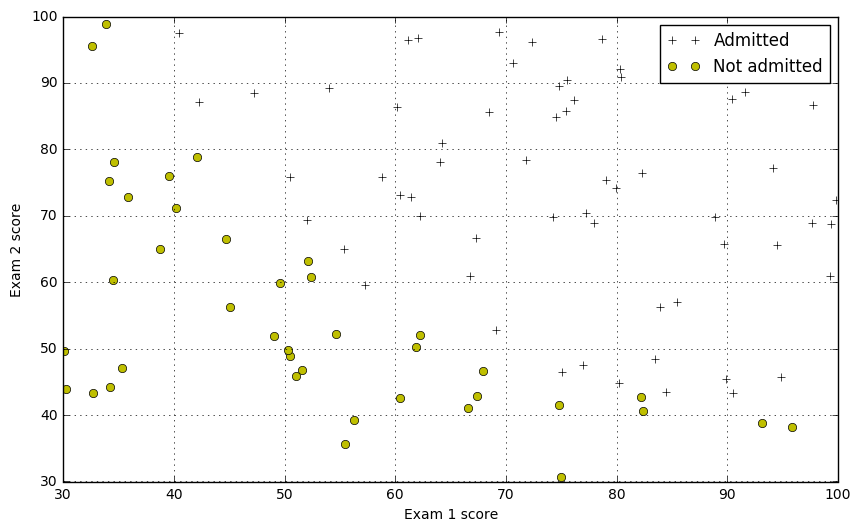

In [27]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

**1.1.2 [5pts] Sigmoid function** 

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$h_\theta(x) = g(\theta^Tx)$

where function g is the sigmoid function. The sigmoid function is defined as:

$g(z) = \dfrac{1}{1+e^{-z}}$

Your first step is to implement/find a sigmoid function so it can be called by the rest of your program. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element. 

When you are finished, (a) plot the sigmoid function, and (b) test the function with a scalar, a vector, and a matrix. For scalar large positive values of x, the sigmoid should be close to 1, while for scalar large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.

The sigmoid function for a scalar 0 : 0.5
The sigmoid function for a vector [0,0,0] : [ 0.5  0.5  0.5]
The sigmoid function for a matrix[[0,0,0],[0,0,0],[0,0,100]] : [[ 0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5       ]
 [ 0.5         0.5         0.62245933]]


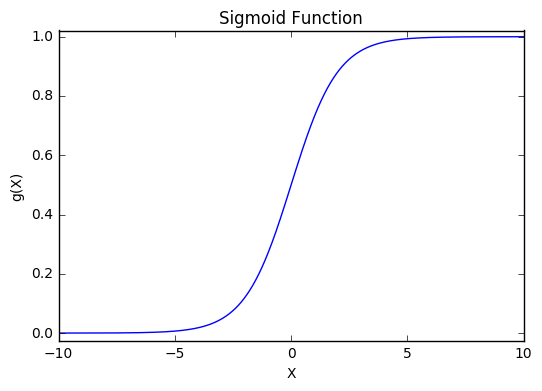

In [28]:
from scipy.special import expit # Hint: Vectorized sigmoid function

# -----------------------------------------------------------------
def sigmoid(z):
    return 1./(1+np.exp(-z))

print("The sigmoid function for a scalar 0 :",sigmoid(0)) 
print("The sigmoid function for a vector [0,0,0] :",sigmoid(np.array([0,0,0])))
print("The sigmoid function for a matrix[[0,0,0],[0,0,0],[0,0,100]] :",sigmoid(np.array([[0,0,0],[0,0,0],[0,0,0.5]])))
    
sigmoid(np.array([[0,0,0],[0,0,0]]))    
x = np.linspace(-10,10,200000)
plt.ylim([-0.025,1.021])
plt.plot(x,sigmoid(x))
plt.xlabel("X")
plt.ylabel("g(X)")
plt.title("Sigmoid Function")
plt.show()
    
#Scalar
#0.5
#Vector
#[ 0.00669285  0.5         0.99330715]
#Matrix
#[[  6.69285092e-03   5.00000000e-01   9.93307149e-01]
#[  4.53978687e-05   5.00000000e-01   9.99954602e-01]
#[  1.19202922e-01   5.00000000e-01   8.80797078e-01]]
# -----------------------------------------------------------------

**1.1.3 [15pts] Cost function and gradient**

Now you will implement the cost function and gradient for logistic regression. Complete the code
in the functions *h* and *computeCost* below to return the value of the hypothesis function and the cost, respectively. Recall that the cost function in logistic regression is

$j(\theta) \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ [ \ -y^{(i)} log(h_\theta(x^{(i)})) \ - \ (1 - y^{(i)})log(1-h_\theta(x^{(i)})) \ ]$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1,...,n$) is defined as follows:

$\frac{\partial J(\theta)}{\partial \theta_{j}} \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}$

where $m$ is the number of points and $n$ is the number of features. Note that while this gradient looks identical to the linear regression gradient, the formula is
actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
Once you are done, your costFunction will be called using the zeros as the initial parameters of $\theta$. You
should see that the cost is about 0.693. 

In [29]:
# Hypothesis function and cost function for logistic regression
import math

def h(mytheta,myX): # Logistic hypothesis function
    # -----------------------------------------------------------------
    return sigmoid(np.dot(myX,mytheta))
    #raise NotImplementedError("Replace this raise statement with "
                              #"your code")
    # -----------------------------------------------------------------

# Cost function
def computeCost(mytheta,myX,myy): 
    """
    mytheta is an n-dimensional vector of initial theta guess
    myX is matrix with m-rows and n-columns
    myy is a matrix with m-rows and 1-column
    """
    # -----------------------------------------------------------------
   
      
    m=myX.shape[0]
    
    
    first = np.dot(-myy.T,np.log(h(mytheta,myX)))
    second = np.dot((1-myy).T,np.log(1-h(mytheta,myX)))
    
   
  
    
    #cost_half = np.sum(np.multiply((-myy),np.log(h(mytheta,myX)))- np.multiply((1-myy),np.log(h(mytheta,myX)))) 
    
    cost_half = first - second 
    

    #cost_half = sum(sum(((-myy)*np.log(h(mytheta,myX)))-((1-myy)*np.log(1-h(mytheta,myX))))) 
    cost = np.sum(cost_half/m)
    
    
     
    return cost
    # -----------------------------------------------------------------

In [30]:
# Check that with theta as zeros, cost is about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.69314718055994518

**1.1.4 Learning parameters using *fmin***

In the previous assignment, you found the optimal parameters of a linear regression model by
implementing gradient descent. You wrote a cost function and calculated its gradient, then took
a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will
use a scipy.optimize built-in function called *fmin*.

The final $\theta$ value will then be used to plot the
decision boundary on the training data, as seen in the figure below.

In [31]:
# Note "fmin" does not need to be told explicitly the derivative terms
# It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html

from scipy import optimize


def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy), maxiter=400, full_output=True)
    return result[0], result[1]

In [32]:
import scipy
scipy.__version__

'0.19.1'

In [33]:
theta, mincost = optimizeTheta(initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [34]:
# Call your costFunction function using the optimal parameters of θ. 
# You should see that the cost is about 0.203.
print (computeCost(theta,X,y))

0.20349770159


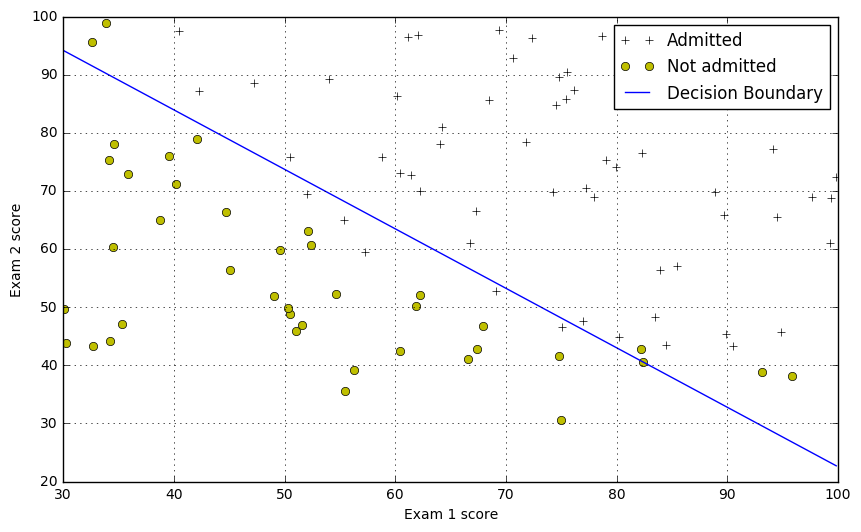

In [35]:
# Plotting the decision boundary: two points, draw a line between
# Decision boundary occurs when h = 0, or when
# theta0 + theta1*x1 + theta2*x2 = 0
# y=mx+b is replaced by x2 = (-1/theta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()
plt.show()

**1.1.5 [15pts] Evaluating logistic regression**

After learning the parameters, you can use the model to predict whether a particular student will
be admitted. 

(a) [5pts] Show that for a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should
expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the
learned model predicts on our training set. 

(b) [10 pts] In this part, your task is to complete the code in
*makePrediction*. The predict function will produce “1” or “0” predictions given a dataset and a learned
parameter vector $\theta$. After you have completed the code, the script below will proceed to report the
training accuracy of your classifier by computing the percentage of examples it got correct. You
should also see a Training Accuracy of 89.0. 

In [36]:
# For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
# you should expect to see an admission probability of 0.776.

# -----------------------------------------------------------------

x1 = np.array([1,45,85])

h(theta,x1) 

#raise NotImplementedError("Replace this raise statement with "
#                         "your code")
# -----------------------------------------------------------------

0.77629159041124107

In [37]:
def makePrediction(mytheta, myx):
    # -----------------------------------------------------------------
    #raise NotImplementedError("Replace this raise statement with "
    #                         "your code")
    # -----------------------------------------------------------------
    
    p = (h(mytheta,myx)) > 0.5 
    
    return p

# Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print ("Fraction of training samples correctly predicted: %f." % prcnt_correct)

Fraction of training samples correctly predicted: 0.890000.


### 2. Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant pass quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips in *ex2data2.txt*, from which you can build a logistic regression model.

**2.1 Visualizing the data**

Similar to the previous parts of this exercise, plotData is used to generate the figure below,
where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0,
rejected) examples are shown with different markers.

The figure below shows that our dataset cannot be separated into positive and negative examples by a
straight line. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

In [38]:
datafile = 'data/ex2data2.txt'
# Read in comma separated data
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) 
# Form the usual "X" data matrix and "y" label vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
# Insert the usual column of 1's into the "X" matrix (for bias incorporation)
X = np.insert(X,0,1,axis=1)

In [39]:
# Divide the sample into two: pos classification, neg classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

**2.2 Nonlinear feature mapping**

One way to fit the data better is to create more features from each data point. In *mapFeature* below, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the
sixth power as follows:

\begin{equation}
mapFeature(x) \ = \
\begin{bmatrix}
    1 \\
    x_1 \\
    x_2 \\
    x_1^2 \\
    x_1x_2 \\
    x_2^2 \\
    x_1^3 \\
    \vdots \\
    x_1x_2^5 \\
    x_2^6 \\
\end{bmatrix}
\end{equation}

As a result of this mapping, our vector of two features (the scores
on two QA tests) has been transformed into a 28-dimensional
vector. A logistic regression classifier trained on this
higher-dimension feature vector will have a more complex
decision boundary and will appear nonlinear when drawn in our
2-dimensional plot.
While the feature mapping allows us to build a more expressive
classifier, it is also more susceptible to overfitting. In the next parts
of the exercise, you will implement regularized logistic regression
to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [40]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a nx28-dim matrix of featuers
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [41]:
# Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

**2.3 Cost function and gradient**

Now you will implement code to compute the cost function and gradient for regularized logistic
regression. Recall that the regularized cost function in logistic regression is:

$j(\theta) \ = \ [ \ \frac{1}{m} \ \sum_{i=1}^{m} \ [ \ -y^{(i)} log(h_\theta(x^{(i)})) \ - \ (1 - y^{(i)})log(1-h_\theta(x^{(i)})) \ ] \ ] \ + \frac{\lambda}{2m} \sum_{j=2}^{n} \theta_j^2 $

Note that you should not regularize the parameter $\theta_0$ (Why not? Think about why that would be a bad idea).

The gradient of the cost function is a vector where the j element is defined as follows (you should understand how to obtain this expression):

$\frac{\partial J(\theta)}{\partial \theta_{0}} \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)} \quad \quad \quad \quad \quad \quad$ for $\quad j=0$

$\frac{\partial J(\theta)}{\partial \theta_{j}} \ = \ (\frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}) + \frac{\lambda}{m}\theta_j \quad \quad \quad$ for $\quad j \ge 1$

**2.3.1 [10pts] Implementing regularized logistic regression**

Re-implement computeCost with regularization.

In [50]:
# Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    mytheta is an n-dimensional vector of initial theta guess
    myX is matrix with n-columns and m-rows
    myy is a matrix with m-rows and 1-column
    This includes regularization if you set mylambda to nonzero
    """
    # -----------------------------------------------------------------
    #raise NotImplementedError("Replace this raise statement with "
    #                          "your code")
    # -----------------------------------------------------------------
    
    m=myX.shape[0]
    
    
    
    reg = np.sum(mylambda*(theta[2:len(theta)])**2)/(2*m)
    
    
    first = np.dot(-myy.T,np.log(h(mytheta,myX)))
    second = np.dot((1-myy).T,np.log(1-h(mytheta,myX)))
    
    cost_half = first - second 
    
    cost = np.sum(cost_half/m) + reg
   
    return cost
    

    

Once you are done, you will call your cost function using the initial value of
θ (initialized to all zeros). You should see that the cost is about 0.693. 

In [51]:
# Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
# and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.69314718055994529

**2.3.2 [15pts] Learning parameters using *minimize***

You will use *optimize.minimize* to learn the optimal parameters $\theta$. If you
have completed the cost and gradient for regularized logistic regression correctly, you should be able to learn the parameters
$\theta$ using *minimize*. Implement the function *optimizeRegularizedTheta* below.  

In [52]:
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    # -----------------------------------------------------------------
    #raise NotImplementedError("Replace this raise statement with "
    #                          "your code")
    # -----------------------------------------------------------------
    
    result = optimize.minimize(computeCost, x0=mytheta, args=(myX, myy, mylambda))
    
    return result.x, result.fun 

theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

**2.4 Plotting the decision boundary**

To help you visualize the model learned by this classifier, we have provided the function
*plotBoundary* which plots the (non-linear) decision boundary that separates the
positive and negative examples. 

In [53]:
def plotBoundary(mytheta, myX, myy, mylambda):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    # display text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

**2.4.1 [10pts] Plot Decision Boundaries**

(a) [4 pts] Use *plotBoundary* to obtain four subplots of the decision boundary for the following values of the regularization parameter: $\lambda \ = \ 0, 1, 10, 100$

(b) [2 pts] Comment on which plots are overfitting and which plots are underfitting.

(c) [2 pts] Which is the model with the highest bias? The highest variance?

(d) [2 pts] What is another way to detect overfitting?

/Users/Riken/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Riken/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


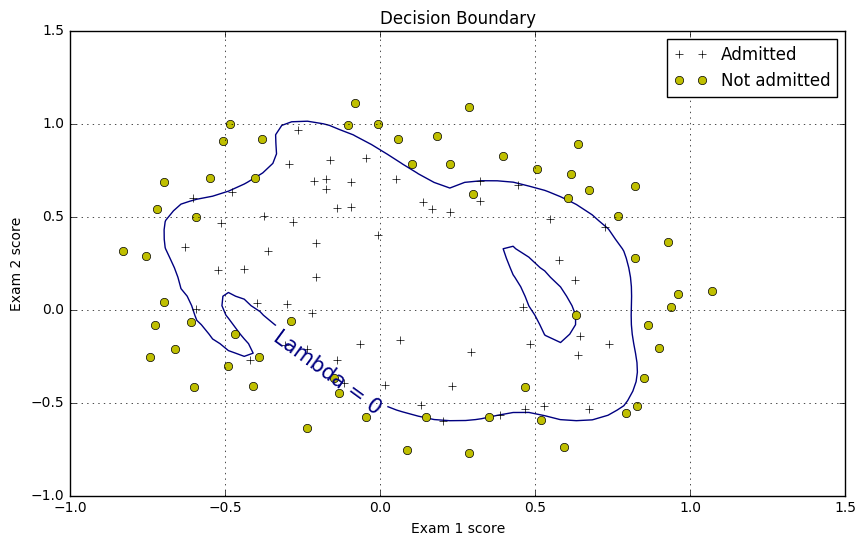

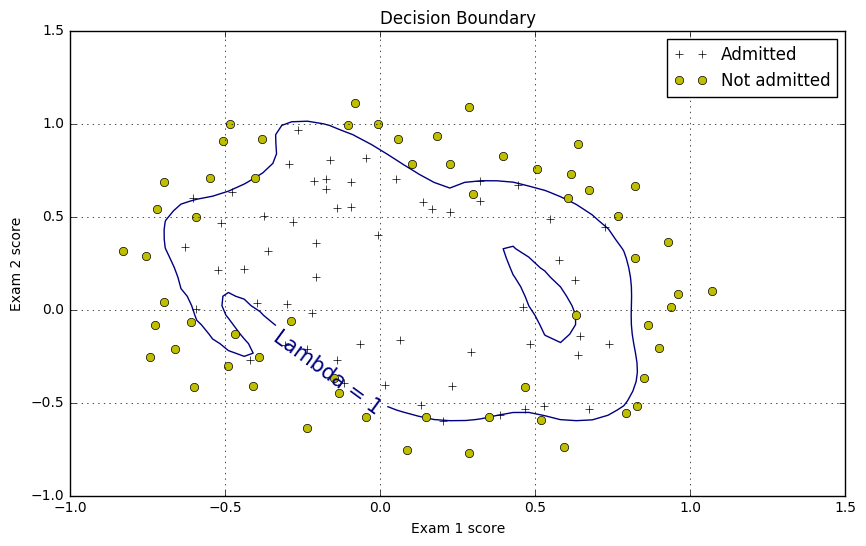

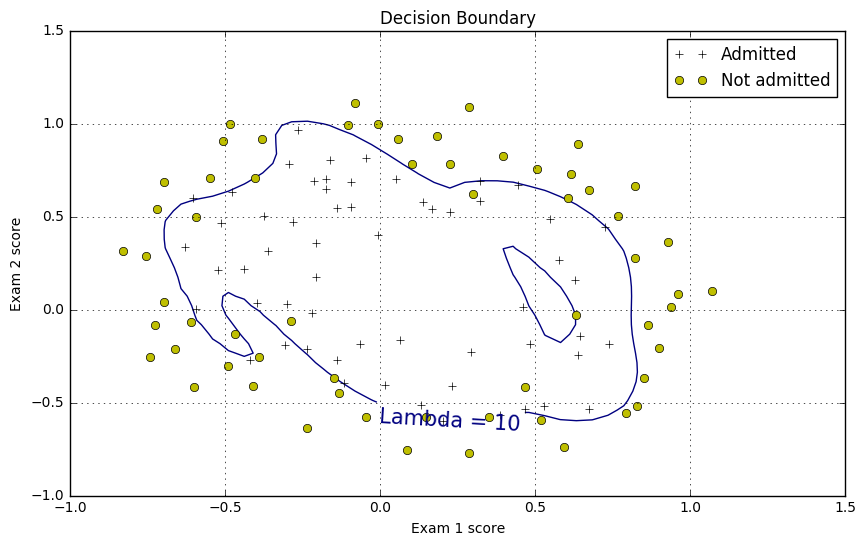

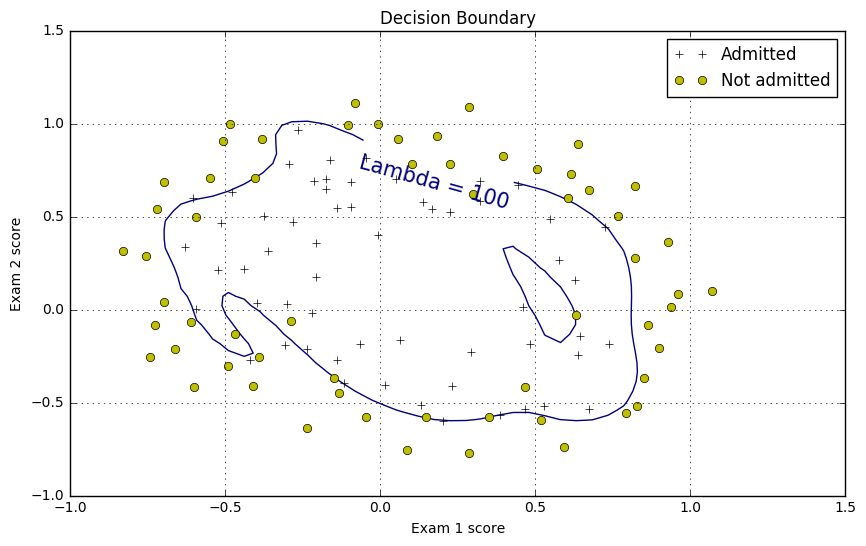

In [54]:
# (a) Build a figure showing contours for various values of regularization parameter, lambda

# -----------------------------------------------------------------
#raise NotImplementedError("Replace this raise statement with "
#                          "your code")
# -----------------------------------------------------------------
 
lambdas = [0,1,10,100]

for i in lambdas:
 
 plotData()
 plotBoundary(theta, mappedX, y, mylambda= i)
 
 plt.show()



**[Click here to insert your solution for (b), (c), and (d)]**

### 3. Written part

These problems are extremely important preparation for the exam. Submit solutions to each problem by filling the markdown cells below.

**3.1 [10pts]** Maximum likelihood for Logistic Regression

Showing all steps, derive the LR cost function using maximum likelihood. Assume that
the probability of y given x is described by:

$P(\ y=1 \; \vert \; x \ ; \ \theta \ ) = h_{\theta}(x)$ 

$P(\ y=0 \; \vert \; x \ ; \ \theta \ ) = 1 - h_{\theta}(x)$



$p(y=y_i|x,\theta)= (h(\theta,X)^{y_i})(1-h(\theta,X)^{1-y_i})$  For one example

$=\prod_{i=1}^{m} (h(\theta,X)^{y_i})(1-h(\theta,X)^{1-y_i})$  For multiple examples

take the natural log both side. 

$ln(p(y=y_i|x,\theta)) = \sum_{i=1}^{m} (y_i) ln(h(\theta,X))+(1-y_i)ln(1-h(\theta,X))$

This is exactly equal to our Cost function from our logistic model

cost = $\sum_{i=1}^{m} (y_i) ln(h(\theta,X))+(1-y_i)ln(1-h(\theta,X))$    where h is our hypothesis/probabilities






**3.2 [10pts]** Logistic Regression Classification with Label Noise

Suppose you are building a logistic regression classifier for images of dogs, represented by a feature vector x, into one of two categories $y \in \{0,1\}$, where 0 is “terrier” and 1 is “husky.” You decide to use the logistic regression model $p(y = 1 \ \vert \ x) = h_{\theta}(x)=\theta^Tx.$ You collected an image dataset **D**$\ = \{x^{(i)},t^{(i)}\}$, however, you were very tired and made
some mistakes in assigning labels $t^{(i)}.$ You estimate that you were correct in about $\tau$ fraction of all cases.

(a) Write down the equation for the posterior probability $p(t = 1 \ \vert \ x)$ of the label being 1 for some point x, in terms of the probability of the true class, $p(y = 1 \ \vert \ x).$

(b) Derive the modified cost function in terms of $\ \theta, x^{(i)},t^{(i)}$ and $\tau$.

**[Click here to insert your solution]**

**3.3 [10pts] Cross-entropy loss for multiclass classification**

This problem asks you to derive the cross-entropy loss for a multiclass classification problem using maximum likelihood.
Consider the multiclass classification problem in which each input is assigned to one of $K$ mutually exclusive classes. The binary target variables $y_k$ ∈ {0, 1} have a "one-hot" coding scheme, where the value is 1 for the indicated class and 0 for all others. Assume that we can interpret the network outputs as $h_k(x,\theta) = p(y_k = 1|x)$, or the probability of the kth class.

Show that the maximum likelihood estimate of the parameters $\theta$ can be obtained by minimizing the multiclass *cross-entropy* loss function 
<p>
$L(\theta)= - \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$
</p>
<p>
where $N$ is the number of examples $\{x_i,y_i\}$. </p>

**[Click here to insert your solution]** 